In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

**1) Read and Explore the dataset**

In [2]:
colnames=['UserID','ProductID','Ratings','TimeStamp']
data=pd.read_csv('C:\\Users\\koushik\\Downloads\\Semester\\PGP in AI and ML\\Lab ML\\Project  Recommendation System-06-Dec-2019\\ratings_Electronics.csv',
                names=colnames, header=None)

In [3]:
data.head(5)

,UserID,ProductID,Ratings,TimeStamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
data.drop('TimeStamp', axis=1, inplace=True)

In [5]:
data.head(5)

,UserID,ProductID,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [6]:
data.shape

(7824482, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
UserID       object
ProductID    object
Ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [8]:
data.describe()

,Ratings
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [9]:
data.isnull().sum()

UserID       0
ProductID    0
Ratings      0
dtype: int64

In [10]:
data['UserID'].unique().shape

(4201696,)

**Histogram**

In [11]:
sns.set(color_codes=True)
sns.set(style="white", palette="muted")

C:\Users\koushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


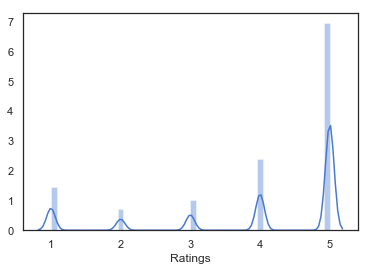

In [12]:
# Ratings

sns.distplot(data['Ratings'])
# Ratings column data is normally distributed

**2) Users given 50 or more number of ratings**

In [13]:
data_50 = data.groupby('UserID', as_index=False).agg({'Ratings': np.count_nonzero })

In [14]:
data_50.shape

(4201696, 2)

In [15]:
data_50.head(5)

,UserID,Ratings
0,A00000262KYZUE4J55XGL,1.0
1,A000063614T1OE0BUSKUT,2.0
2,A00009182QVLSWIGHLS1B,1.0
3,A00009661LC9LQPGKJ24G,1.0
4,A00010809P09NUU6ZP6H,1.0


In [16]:
data_50=data_50[data_50['Ratings']>=50]

In [17]:
data_50.shape

(1540, 2)

In [18]:
data_50 = pd.merge(data,data_50, on=['UserID'], how='inner')

In [19]:
data_50.head(5)

,UserID,ProductID,Ratings_x,Ratings_y
0,A3BY5KCNQZXV5U,0594451647,5.0,50.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,50.0
2,A3BY5KCNQZXV5U,B000063574,5.0,50.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0,50.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0,50.0


In [20]:
data_50.drop('Ratings_y', axis=1, inplace=True)

In [21]:
data_50.shape

(125871, 3)

In [22]:
data_50 = data_50.rename({'Ratings_x': 'Ratings'}, axis=1)

In [23]:
data_50.head(5)

,UserID,ProductID,Ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


**3) Split data into train and test set**

**Converting data into the form of Surprise dataset**

In [24]:
reader = Reader(rating_scale=(1, 5))

In [25]:
data = Dataset.load_from_df(data_50, reader)

In [26]:
trainset, testset = train_test_split(data, test_size=.3)

In [27]:
trainset.ur

defaultdict(list,
            {0: [(0, 4.0),
              (75, 5.0),
              (357, 4.0),
              (923, 3.0),
              (3269, 4.0),
              (3473, 4.0),
              (5486, 4.0),
              (6115, 4.0),
              (7111, 5.0),
              (6553, 4.0),
              (4134, 5.0),
              (9969, 3.0),
              (106, 5.0),
              (10240, 4.0),
              (14722, 4.0),
              (2570, 5.0),
              (10974, 4.0),
              (4132, 3.0),
              (18614, 5.0),
              (1326, 4.0),
              (13955, 3.0),
              (15028, 5.0),
              (2853, 5.0),
              (6107, 3.0),
              (1681, 3.0),
              (404, 3.0),
              (15715, 3.0),
              (8594, 5.0),
              (3925, 5.0),
              (14975, 5.0),
              (2721, 5.0),
              (3957, 5.0),
              (198, 5.0),
              (309, 3.0),
              (5871, 5.0),
              (8122, 4.0),
          

In [28]:
testset

[('A10ZBR6O8S8OCY', 'B001KURYAS', 4.0),
 ('A37D1ZP8GBHE38', 'B000F71URU', 5.0),
 ('A316XO4RWX21YN', 'B003NSBKSC', 5.0),
 ('ASJSX783R5HTZ', 'B00005LEOI', 5.0),
 ('A1VQHH85U7PX0', 'B000EY5F5C', 5.0),
 ('A19UTUEBWKIZFT', 'B003ZX8B0U', 4.0),
 ('A2Y29IRSI08F0I', 'B0040702HU', 4.0),
 ('A2HJY7418G1KV1', 'B00BTRO0RC', 4.0),
 ('ANEDXRFDZDL18', 'B0071BTJPI', 4.0),
 ('AUITG1DJ3QUGK', 'B003LSTD38', 5.0),
 ('A3LPL35P7FH78Y', 'B000JNQSIQ', 5.0),
 ('ARX0KOX5Q01BJ', 'B00CPU8MOO', 3.0),
 ('A1U5IJHJK84S54', 'B00AI7G4GE', 5.0),
 ('A1RL1OTV8IJMVD', 'B005DQG5SC', 4.0),
 ('AMUP8DYE7EAN2', 'B009OZUPUC', 3.0),
 ('ADLVFFE4VBT8', 'B000UF3FT8', 1.0),
 ('A1U5IJHJK84S54', 'B000ABPKB8', 5.0),
 ('A1NRMTQ5SZPZA', 'B00G6CLN3Y', 2.0),
 ('A3U6J0DLLDEWM2', 'B005KQ2O26', 5.0),
 ('AGXV8E7XK9J6H', 'B000FKQ8LA', 4.0),
 ('AR8LWDT6TUKNZ', 'B005IQRMN4', 5.0),
 ('A3QRR8PSCBI07C', 'B001TYRYHS', 2.0),
 ('A209G57KXCBF4C', 'B00KAH0YMM', 4.0),
 ('A1X1CEGHTHMBL1', 'B00746LVOM', 5.0),
 ('AW68KVDV7BBRS', 'B000QD5BFU', 4.0),
 ('AFXTKAO0C

**4) Popularity Recommender Model**

In [29]:
#data_50.groupby('ProductID')['Ratings'].mean().sort_values(ascending=False).head()
#data_50.groupby('ProductID')['Ratings'].count().sort_values(ascending=False).head()  
#ratings_mean_count = pd.DataFrame(data_50.groupby('ProductID')['Ratings'].mean(), index=None) 
#ratings_mean_count.head(5)
#ratings_mean_count['Rating_counts'] = pd.DataFrame(data_50.groupby('ProductID')['Ratings'].count())  
#ratings_mean_count['ProductID'] = ratings_mean_count.index
#ratings_mean_count.reset_index(drop=True, inplace=True)
#ratings_mean_count=ratings_mean_count[['ProductID','Ratings','Rating_counts']]
#ratings_mean_count.rename(columns={'Ratings': 'Avg_Ratings'}, inplace=True)
#ratings_mean_count.describe()
#ratings_mean_count.head(5)
#ratings_mean_count.loc[(ratings_mean_count['Avg_Ratings']==5) & (ratings_mean_count['Rating_counts']>=15)]

In [30]:
#algo_mat = SVD()
#algo_mat.fit(trainset)
#predictions = algo_mat.test(testset)
#predictions
#print("Popularity Recommender Model Accuracy:")
#print(accuracy.rmse(predictions, verbose=True))
#print(accuracy.mse(predictions, verbose=True))
#print(accuracy.mae(predictions, verbose=True))
#print(accuracy.fcp(predictions, verbose=True))

In [31]:
data_50.groupby('ProductID')['Ratings'].mean().sort_values(ascending=False).head()

ProductID
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: Ratings, dtype: float64

In [32]:
data_50.groupby('ProductID')['Ratings'].count().sort_values(ascending=False).head()  

ProductID
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: Ratings, dtype: int64

In [33]:
ratings_mean_count = pd.DataFrame(data_50.groupby('ProductID')['Ratings'].mean(), index=None) 

In [34]:
ratings_mean_count.head(5)

,Ratings
ProductID,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.750000
1400501466,3.333333


In [35]:
ratings_mean_count['Rating_counts'] = pd.DataFrame(data_50.groupby('ProductID')['Ratings'].count())  

In [36]:
ratings_mean_count['ProductID'] = ratings_mean_count.index

In [37]:
ratings_mean_count.reset_index(drop=True, inplace=True)

In [38]:
ratings_mean_count=ratings_mean_count[['ProductID','Ratings','Rating_counts']]

In [39]:
ratings_mean_count.rename(columns={'Ratings': 'Avg_Ratings'}, inplace=True)

In [40]:
ratings_mean_count.describe()

,Avg_Ratings,Rating_counts
count,48190.000000,48190.000000
mean,4.214899,2.611973
std,1.030317,5.141867
min,1.000000,1.000000
25%,4.000000,1.000000
50%,4.538462,1.000000
75%,5.000000,2.000000
max,5.000000,206.000000


In [41]:
ratings_mean_count.head(5)

,ProductID,Avg_Ratings,Rating_counts
0,0594451647,5.000000,1
1,0594481813,3.000000,1
2,0970407998,2.500000,2
3,0972683275,4.750000,4
4,1400501466,3.333333,6


**5) Collaborative Filtering Model**

In [42]:
algo_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [43]:
test_pred = algo_user.test(testset)

In [44]:
test_pred

[Prediction(uid='A10ZBR6O8S8OCY', iid='B001KURYAS', r_ui=4.0, est=3.352725068872186, details={'actual_k': 3, 'was_impossible': False}),
 Prediction(uid='A37D1ZP8GBHE38', iid='B000F71URU', r_ui=5.0, est=4.259916694094814, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A316XO4RWX21YN', iid='B003NSBKSC', r_ui=5.0, est=3.9464285714285716, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ASJSX783R5HTZ', iid='B00005LEOI', r_ui=5.0, est=4.259916694094814, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1VQHH85U7PX0', iid='B000EY5F5C', r_ui=5.0, est=4.721394984326018, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A19UTUEBWKIZFT', iid='B003ZX8B0U', r_ui=4.0, est=2.494718309859155, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A2Y29IRSI08F0I', iid='B0040702HU', r_ui=4.0, est=4.666666666666667, details={'actual_k': 0, 'was_impossible': False}),

**6) Evaluate the Models**

**Popularity Recommender Model Accuracy**

In [45]:
data_50.head(5)

,UserID,ProductID,Ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0
2,A3BY5KCNQZXV5U,B000063574,5.0
3,A3BY5KCNQZXV5U,B0000CDJP8,5.0
4,A3BY5KCNQZXV5U,B0007Y794O,5.0


In [46]:
ratings_mean_count.head(5)

,ProductID,Avg_Ratings,Rating_counts
0,0594451647,5.000000,1
1,0594481813,3.000000,1
2,0970407998,2.500000,2
3,0972683275,4.750000,4
4,1400501466,3.333333,6


In [47]:
ratings_mean_count_Eva = pd.merge(data_50,ratings_mean_count, on=['ProductID'], how='inner')

In [48]:
ratings_mean_count_Eva.drop('Rating_counts', axis=1, inplace=True)

In [49]:
ratings_mean_count_Eva.head(5)

,UserID,ProductID,Ratings,Avg_Ratings
0,A3BY5KCNQZXV5U,0594451647,5.0,5.0
1,A3BY5KCNQZXV5U,B00000JD4V,4.0,4.0
2,A3NCIN6TNL0MGA,B00000JD4V,4.0,4.0
3,A1X3DA7C61WZLQ,B00000JD4V,4.0,4.0
4,A3BY5KCNQZXV5U,B000063574,5.0,5.0


In [50]:
print("Popularity Recommender Model Accuracy:")
print('RMSE:',sqrt(mean_squared_error(ratings_mean_count_Eva['Ratings'], ratings_mean_count_Eva['Avg_Ratings'])))
print('MSE:',mean_squared_error(ratings_mean_count_Eva['Ratings'], ratings_mean_count_Eva['Avg_Ratings']))
print('MAE:',mean_absolute_error(ratings_mean_count_Eva['Ratings'], ratings_mean_count_Eva['Avg_Ratings']))

Popularity Recommender Model Accuracy:
RMSE: 0.7303631933166138
MSE: 0.5334303941516414
MAE: 0.4551146184725383


**Collaborative Filtering Model Accuracy**

In [51]:
print("Collaborative Filtering Model Accuracy:")
print(accuracy.rmse(test_pred, verbose=True))
print(accuracy.mse(test_pred, verbose=True))
print(accuracy.mae(test_pred, verbose=True))
print(accuracy.fcp(test_pred, verbose=True))

Collaborative Filtering Model Accuracy:
RMSE: 1.0499
1.0498842637468833
MSE: 1.1023
1.1022569672633353
MAE:  0.7763
0.7762747744870074
FCP:  0.4478
0.44784445664843886


**7) Get Top 5 Recommendations**

**Popularity Recommender Model Recommendations**

In [52]:
ratings_mean_count_5=ratings_mean_count.loc[(ratings_mean_count['Avg_Ratings']==5) & (ratings_mean_count['Rating_counts']>=15)].head(5)
ratings_mean_count_5

,ProductID,Avg_Ratings,Rating_counts
9108,B000FQ2JLW,5.0,19
9976,B000IJY8DS,5.0,17
14230,B0012Y6HC8,5.0,15
18889,B001TH7GUA,5.0,17
23326,B0033PRWSW,5.0,15


**Collaborative Filtering Model Recommendations**

In [53]:
def get_top_n_c(test_pred, n=5):
    # First map the predictions to each user.
    top_n_c = defaultdict(list)
    for uid, iid, true_r, est, _ in test_pred:
        top_n_c[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n_c.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n_c[uid] = user_ratings[:n]

    return top_n_c

In [54]:
top_n_c = get_top_n_c(test_pred, n=5)

In [55]:
top_n_c

defaultdict(list,
            {'A10ZBR6O8S8OCY': [('B0035FZ124', 5),
              ('B001N85NMI', 5),
              ('B00C25I5TE', 5),
              ('B001OOZU8I', 5),
              ('B002VPE1XY', 5)],
             'A37D1ZP8GBHE38': [('B004ELA0SS', 5),
              ('B00EH5UGR6', 5),
              ('B00DY2Y28M', 5),
              ('B0081H8TRA', 5),
              ('B00EU9V3YO', 4.942546456954267)],
             'A316XO4RWX21YN': [('B0046HAO40', 5),
              ('B00829TIEK', 4.786073517661769),
              ('B002FL507A', 4.765977443609023),
              ('B00ATM1MVU', 4.6377865961199305),
              ('B000WALWW8', 4.59971850688804)],
             'ASJSX783R5HTZ': [('B0000BZL1P', 5),
              ('B00752R4PK', 5),
              ('B0065DUJ0C', 4.8410941061543475),
              ('B002EUCU3O', 4.676929941990183),
              ('B004RORMF6', 4.64773373838208)],
             'A1VQHH85U7PX0': [('B001MYL1BA', 5),
              ('B000V5K3FG', 5),
              ('B002W3IXZW', 5),
   

In [56]:
for uid, user_ratings in top_n_c.items():
    print(uid, [iid for (iid, _) in user_ratings])

A10ZBR6O8S8OCY ['B0035FZ124', 'B001N85NMI', 'B00C25I5TE', 'B001OOZU8I', 'B002VPE1XY']
A37D1ZP8GBHE38 ['B004ELA0SS', 'B00EH5UGR6', 'B00DY2Y28M', 'B0081H8TRA', 'B00EU9V3YO']
A316XO4RWX21YN ['B0046HAO40', 'B00829TIEK', 'B002FL507A', 'B00ATM1MVU', 'B000WALWW8']
ASJSX783R5HTZ ['B0000BZL1P', 'B00752R4PK', 'B0065DUJ0C', 'B002EUCU3O', 'B004RORMF6']
A1VQHH85U7PX0 ['B001MYL1BA', 'B000V5K3FG', 'B002W3IXZW', 'B001D60LG8', 'B003ZLISZU']
A19UTUEBWKIZFT ['B00E98O7GC', 'B008X9Z44M', 'B005LSZ2TA', 'B009QV72VY', 'B003VAHYNC']
A2Y29IRSI08F0I ['B000BQ7GW8', 'B003XIJ3MW', 'B0041OSAZ8', 'B0040702HU', 'B001C9KW8S']
A2HJY7418G1KV1 ['B00BTRO0RC', 'B000J6AVQ8', 'B000L9S34U', 'B00BHQ5NVM', 'B000L9Q2OS']
ANEDXRFDZDL18 ['B0097CZHAU', 'B008MF48J4', 'B008OE0S56', 'B0006UKUNG', 'B0071BTJPI']
AUITG1DJ3QUGK ['B003LPTAYI', 'B005FVNGRI', 'B003LSTD38', 'B00ATE7SZM', 'B00004TZE5']
A3LPL35P7FH78Y ['B003X26VV4', 'B002WE4HE2', 'B0088PUEPK', 'B0058UUR6E', 'B003VAHYNC']
ARX0KOX5Q01BJ ['B003516BJU', 'B004S958VU', 'B008MBDY70', '

A17HMM1M7T9PJ1 ['B00BXF7I9M', 'B002OOWC3I', 'B00DR6DQZA', 'B00CHT6CRC', 'B00AWLCJ6K']
A1K4G5YJDJQI6Q ['B000LZARRU', 'B00006L7U2', 'B000R8KVJ0', 'B0016OK5O0', 'B00BU3YC3W']
A3SDJ70H00OQCJ ['B00141G1W0', 'B00G9GWQ6U', 'B000EBLAB8', 'B004V94QB0', 'B002XB2U6G']
AT09WGFUM934H ['B000QUUFRW', 'B009SQQF9C', 'B000068O34', 'B00FDUHD2K', 'B007PESCCC']
A1MFVAHTT2BHM0 ['B002QEBMAK', 'B002WE4HE2', 'B00006BBAC', 'B004AB35NY', 'B0036XFSGO']
A2ZY3S7SD3QO8Z ['B005Q312KI', 'B000A81AT2', 'B00GO4GMAI', 'B000UKMZ94', 'B00CRY250U']
A1P0JSFW184ZXJ ['B008PQAFR4', 'B004TLH6H6', 'B000CKVOOY', 'B009E6J1BU', 'B001OC6DCW']
A3PJJTAKISAFI9 ['B002N44W64', 'B005NAFEYE', 'B003XTRU58', 'B001D9ZGK6', 'B008P72Q2K']
A35HNL2VEDK9Z1 ['B0007MXZB2', 'B000GHXMO8', 'B000KO0GY6', 'B000VDCT3C', 'B00006JN3G']
A18GJ9MYYO6GCQ ['B002MAPRYU', 'B008X9Z7N0', 'B005HY4U5A', 'B000EVSLRO', 'B000BP50AY']
A1ZCSSCAGBCD49 ['B0036WT1RW', 'B00119T6NQ', 'B00CHRID4Y', 'B00A6UYCT4', 'B004BV7XQ8']
A2X78O6G89CB30 ['B003SQEAY0', 'B002K3Z3DO', 'B004GWY5UE

A25QJBK33C4O0R ['B009WG6JF8', 'B006E76GJM', 'B00BOHNYU6', 'B004ZH13K0', 'B004F9P2KU']
A2I6GN7OHB9JKF ['B0052SCU8U', 'B007WTAJTO', 'B001EAQTRI', 'B00552PEI6', 'B003ZZ2HDA']
A5A4374R8I7NB ['B0002WPSB2', 'B003UE52ME', 'B004D1OBFW', 'B00002NDRQ', 'B00028DM96']
A1U5NWJOYH2QQH ['B000M2TAN4', 'B00008IHOZ', 'B00004UE2R', 'B008J127VC', 'B00130637A']
ASJLXOX1VD4DF ['B0081R7XR2', 'B00BCPGMXQ', 'B00DIOALPE', 'B004DI7CWE', 'B009HL556M']
A3CKI6VEH0HBMJ ['B00BQ4F9ZA', 'B001Q3M9PY', 'B000FVTPX2', 'B000I04WWY', 'B004QK8FBG']
A3094EPI56GKZ6 ['B002PY7LM4', 'B0074BW614', 'B00DQZO3JK', 'B007X3VECU', 'B00DQZQPNM']
AN81JUYW2SL24 ['B005HEUUEA', 'B000023VUE', 'B0032OZNDK', 'B0074BW614', 'B0090EC5MS']
A1ZPY91VE3IDN1 ['B001E1Y5O6', 'B004ZP74IM', 'B0079UAT0A', 'B003ELOSIW', 'B001AAVA08']
A1UNJ46NSB352E ['B00JC5Y6WM', 'B004TKTOWC', 'B00871SR68', 'B0055QYJM4', 'B00HFRXP9Y']
A3SL0HA6422W4M ['B005HSDLCO', 'B009QV15DU', 'B00GO4GMAI', 'B004E10KFG', 'B001EUE6AK']
A13QOK3SKIT9QL ['B0054I4Z0E', 'B002SDRA5K', 'B004Z03Q6G',

**8) Summarising the insights**

1) When compared to Collaborative fitering model, Popularity recommeder model has acceptable accuracy with respect to RMSE, MSE, MAE
2) Popularity recommeder model recommends the same set of products/ items to each users where as collaborative filtering model recommends different products/ items based on the users past data
3) Popularity recommender model can be used when we need to get overall top products/ items where Collaborative filtering model can be used to get top proucts/  items based on the users interest